In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# As man machine chart for different workers are different, we focus on state of machine
# Time spent by machine in each state on some selected days is taken as example
df_state=pd.read_excel('time in each state on each day.xlsx','Sheet5') 

Text(0.5, 1.0, 'Jun 14-15')

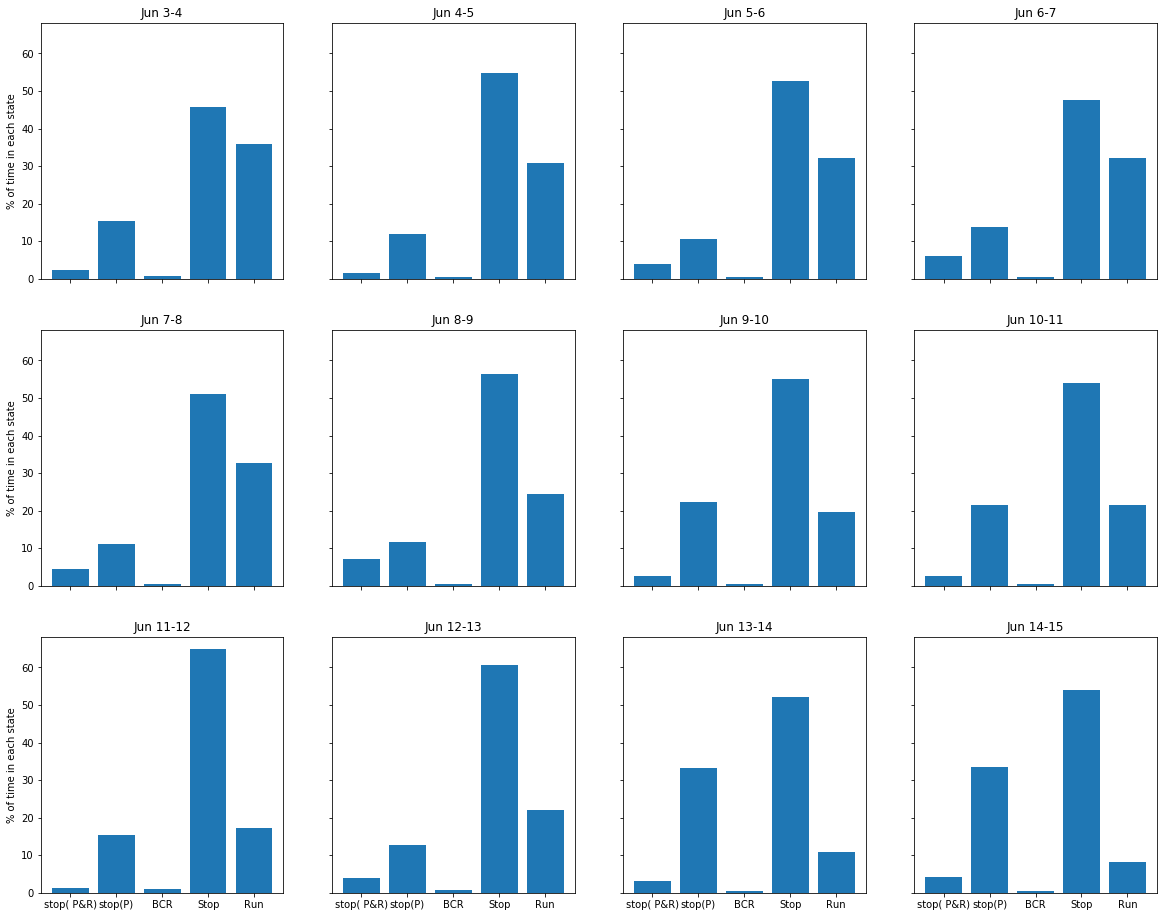

In [5]:
fig,ax=plt.subplots(3,4,sharex=True,sharey=True,figsize=(20,16))
ax[0,0].bar(df_state['State'],df_state['Jun 3-4'])
ax[0,1].bar(df_state['State'],df_state['Jun 4-5'])
ax[0,2].bar(df_state['State'],df_state['jun 5-6'])
ax[0,3].bar(df_state['State'],df_state['jun 6-7'])
ax[1,0].bar(df_state['State'],df_state['Jun 7-8'])
ax[1,1].bar(df_state['State'],df_state['Jun 8-9'])
ax[1,2].bar(df_state['State'],df_state['Jun 9-10'])
ax[1,3].bar(df_state['State'],df_state['Jun 10-11'])
ax[2,0].bar(df_state['State'],df_state['Jun 11-12'])
ax[2,1].bar(df_state['State'],df_state['Jun 12-13'])
ax[2,2].bar(df_state['State'],df_state['Jun 13-14'])
ax[2,3].bar(df_state['State'],df_state['Jun 14-15'])
ax[0,0].set_ylabel('% of time in each state')
ax[1,0].set_ylabel('% of time in each state')
ax[2,0].set_ylabel('% of time in each state')
ax[0,0].set_title('Jun 3-4')
ax[0,1].set_title('Jun 4-5')
ax[0,2].set_title('Jun 5-6')
ax[0,3].set_title('Jun 6-7')
ax[1,0].set_title('Jun 7-8')
ax[1,1].set_title('Jun 8-9')
ax[1,2].set_title('Jun 9-10')
ax[1,3].set_title('Jun 10-11')
ax[2,0].set_title('Jun 11-12')
ax[2,1].set_title('Jun 12-13')
ax[2,2].set_title('Jun 13-14')
ax[2,3].set_title('Jun 14-15')

In [8]:
# As maximum time is spent in stop position, position of worker in stop position is analyzed
# normalized time spent by different workers in different position calculated
df=pd.read_csv('pca_analysis.csv')
df.drop(columns=['Class'],inplace=True)

In [9]:
df.head()  # instances mean no. of time machine remains in stop state


,Date,Worker,Instances,A,C,D,G,O,J,N
0,June 3-4,26,11,3.636364,12.727273,25.454545,5.454545,27.272727,0.000000,25.454545
1,June 3-4,26,12,0.000000,0.000000,53.846154,15.384615,30.769231,0.000000,0.000000
2,June 3-4,26,13,0.000000,0.000000,42.857143,42.857143,14.285714,0.000000,0.000000
3,June 3-4,26,14,0.000000,6.451613,61.290323,12.903226,12.903226,6.451613,0.000000
4,June 3-4,26,15,4.000000,8.000000,66.000000,18.000000,4.000000,0.000000,0.000000


In [10]:
positions = ['A', 'C', 'D', 'G','O','J','N']
x = df.loc[:, positions].values
pd.DataFrame(data = x, columns = positions).head()

,A,C,D,G,O,J,N
0,3.636364,12.727273,25.454545,5.454545,27.272727,0.000000,25.454545
1,0.000000,0.000000,53.846154,15.384615,30.769231,0.000000,0.000000
2,0.000000,0.000000,42.857143,42.857143,14.285714,0.000000,0.000000
3,0.000000,6.451613,61.290323,12.903226,12.903226,6.451613,0.000000
4,4.000000,8.000000,66.000000,18.000000,4.000000,0.000000,0.000000


In [11]:
# there are seven features in the above data, hence to analyze the work pattern we applied dimensionality reduction technique
# we applied principal component analysis with three principal axis for easeness of vidualization
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [12]:
pca.explained_variance_ratio_ #though the total explained variance is less, we have taken it for ease of visualization

array([0.3827384 , 0.30146254, 0.14152791])

In [14]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

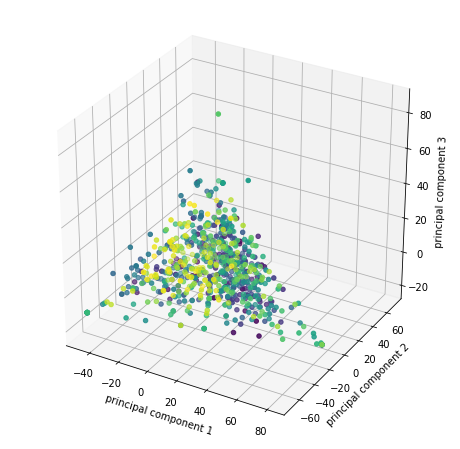

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
col=np.arange(755)
ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],principalDf['principal component 3'],c=col)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
plt.show()